# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Reading the CSV file

In [3]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Quality Checks

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.shape

(9240, 37)

## Duplicate check

In [6]:
sum(leads.duplicated(subset='Prospect ID'))

0

### Inference - Shows no duplicates

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [8]:
# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [9]:
### Null Check
round((100*leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
## Finding columns which are having more than 40% null values
to_drop=leads.loc[:,list(round((100*leads.isnull().sum()/leads.shape[0]),2)>40)].columns
to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [11]:
## Dropping columns that have more than 40% null values
leads=leads.drop(to_drop,axis=1)

In [12]:
#checking null values percentage
round((100*leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

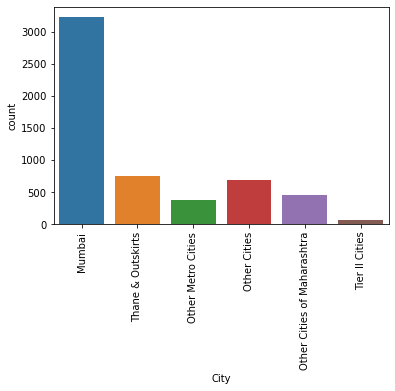

In [13]:
## Checking City
sns.countplot(leads.City)
plt.xticks(rotation = 90)
plt.show()

In [14]:
# Imputing Null with 'Others'
leads['City'] = leads['City'].replace(np.nan, 'Others')

# Merging Cities which are low in numbers to 'Others'
leads['City'] = leads['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [15]:
leads['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

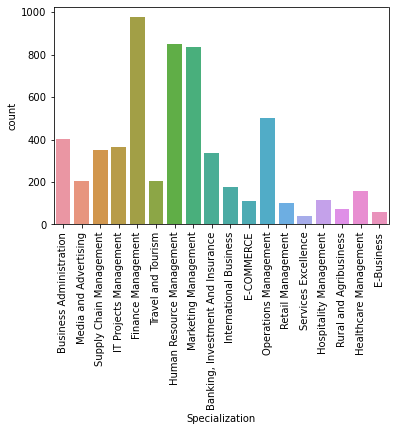

In [16]:
## Checking Specialization
sns.countplot(leads.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [17]:
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [18]:
# Imputing Null with 'Others'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

# Merging Specialization which are low in numbers to 'Others'
leads['Specialization'] = leads['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [19]:
leads.Specialization.value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

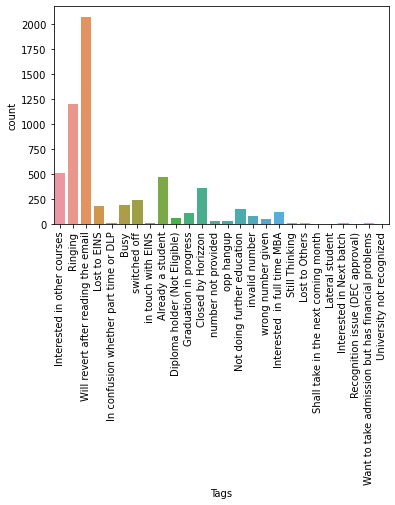

In [20]:
## Checking Tags
sns.countplot(leads.Tags)
plt.xticks(rotation = 90)
plt.show()

In [21]:
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [22]:
# Imputing Null with Others
leads['Tags'] = leads['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others (each category should have minimum 5% of total data)
leads['Tags'] = leads['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

leads.Tags.value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

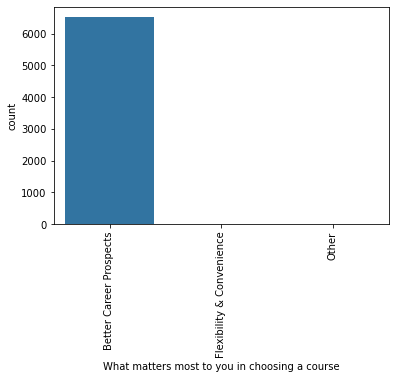

In [23]:
## Checking What matters most to you in choosing a course
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [24]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
## drop 'What matters most to you in choosing a course' as it is highly skewed
leads=leads.drop('What matters most to you in choosing a course',axis=1)

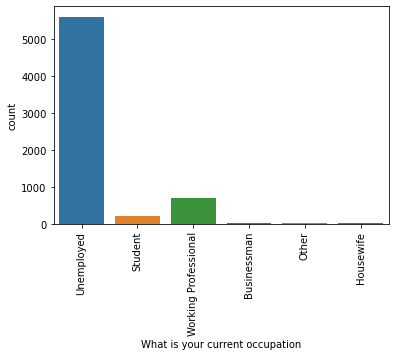

In [26]:
## Checking What is your current occupation
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [27]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Imputing Null with Others
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Other')

In [29]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

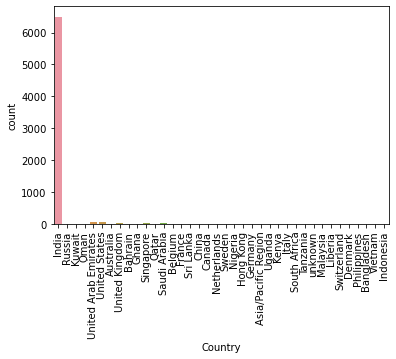

In [30]:
## Checking Country
sns.countplot(leads['Country'])
plt.xticks(rotation = 90)
plt.show()

In [31]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [32]:
## drop 'Country' as it is highly skewed
leads=leads.drop('Country',axis=1)

In [33]:
## Checking Last Activity
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
# Imputing Null with Others
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Others')

# Merging low frequency items to Others
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [35]:
## Checking Last Activity
leads['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [36]:
# Checking unique value counts of Lead Source 

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [37]:
# Merging 2 Google into one category
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')


# Imputing Null with Others
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Others')

# Merging low frequency items to Others
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [38]:
# Checking unique value counts 
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64

In [39]:
## Checking Last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [40]:
# Merging low frequency items to Others
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam', 
                                                                         'Resubscribed to emails', 'Approached upfront', 
                                                                         'Email Received', 'Form Submitted on Website', 
                                                                         'View in browser link Clicked'], 'Others')

In [41]:
# Checking TotalVisits
leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [42]:
# Impute TotalVisits with the median
TotalVisits_med = leads.TotalVisits.median()
leads.TotalVisits.fillna(TotalVisits_med, inplace=True)

In [43]:
# Checking Page Views Per Visit
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [44]:
# Impute Page Views Per Visit with the median
pvpv_med = leads['Page Views Per Visit'].median()
leads['Page Views Per Visit'].fillna(pvpv_med, inplace=True)

## Finally checking the nulls

In [45]:
round((100*leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [46]:
leads_cat = leads.loc[:, leads.dtypes == 'object']
for i in leads_cat:
    print(leads[i].astype('category').value_counts())
    print('###################################################')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
###################################################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
###################################################
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               

### Below columns should be dropped because of high skewness
- Do Not Call
- Do Not Email
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

### Below columns should be dropped because of single category
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque
`

In [47]:
to_drop_cols = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads.drop(to_drop_cols, axis=1, inplace=True)

In [48]:
leads.shape

(9240, 15)

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [50]:
## Creating a copy of the dataset excluding unique identifiers:
leads_excl = leads.drop(['Prospect ID', 'Lead Number'], axis=1)

## Data Visualization

### Uni-variate/BI-Variate Analysis

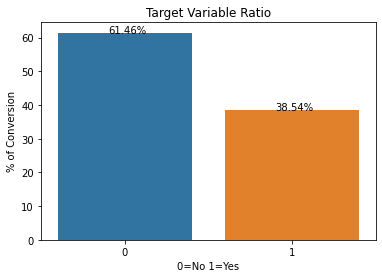

In [51]:
## Percentage of Convered data
ax=sns.barplot(x='Converted', y='Converted', data=leads_excl, estimator=lambda x: len(x) / len(leads_excl) * 100)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('0=No 1=Yes')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

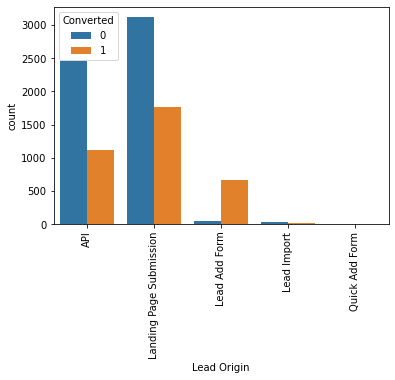

In [52]:
## Lead Origin 
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from Lead Origin
- API and Landing Page Submission have around 35-40% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import and Quick Add From are very less in count.

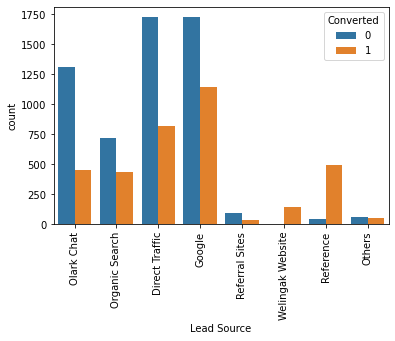

In [53]:
## Lead Source
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from Lead Source
- Direct Traffic and Google are generating high number of leads; should be focused for their conversion
- Welingak and Reference are having more conversion rate hence should be focused to generate more leads
- leads from Olark Chat and Organic Search should be focused for conversion

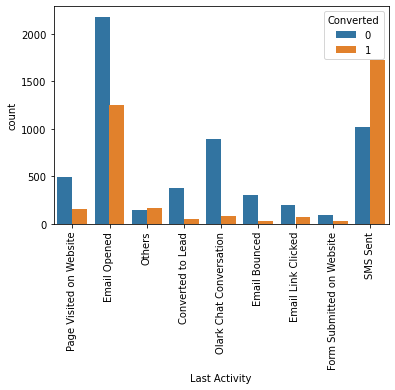

In [54]:
## Last Activity
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from Last Activity
- Most of the leads have Email Opened and SMS Sent. More focus should be on leads opening email.
- conersion rate for SMS sent is very high and hence they should be targeted for lead conversion

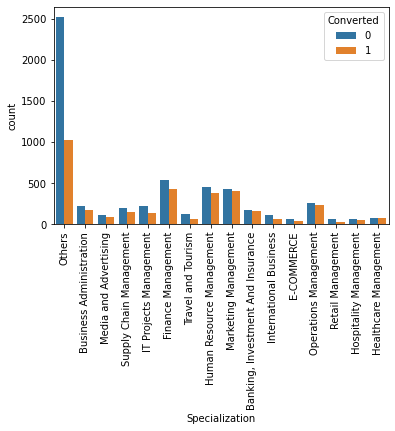

In [55]:
## Specialization
sns.countplot(x = "Specialization", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from Specialization
- focus should be on those various specializations with less leads but high conversion rate.
- Most of the leads are from 'Others'(Not specified) specialization but the conversion rate is poor

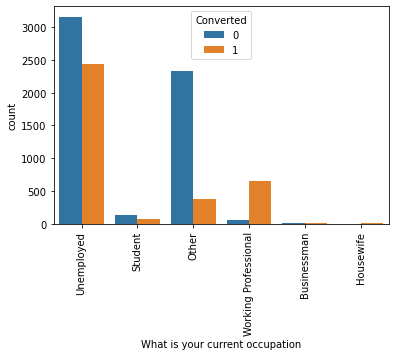

In [56]:
## What is your current occupation
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from What is your current occupation
- Working prefessionals have high conversion. focus should be on them for more leads
- Most of the leads are from Unemployed section, foucs should be increasing conversion from them

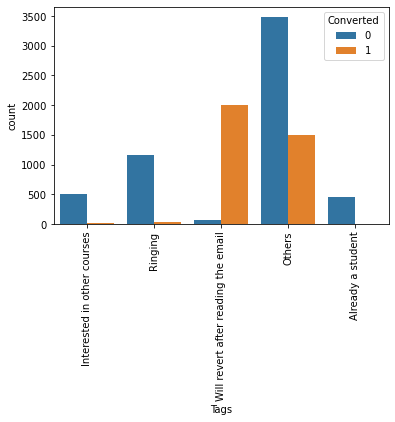

In [58]:
## Tags
sns.countplot(x = "Tags", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from Tags
- 'Will Revert after reading the email' have high conversion. focus should be on them for more leads
- Most of the leads are from 'Others'(Unspecified) section, foucs should be increasing conversion from them

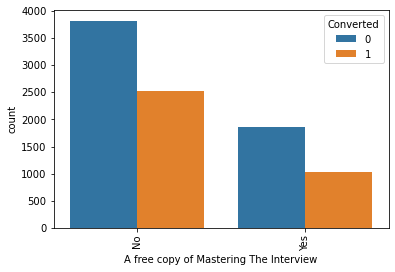

In [59]:
## A free copy of Mastering The Interview
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from A free copy of Mastering The Interview
- More leads are from those who do not ask for free copy of Mastering Interviews. Can be focused for conversion.

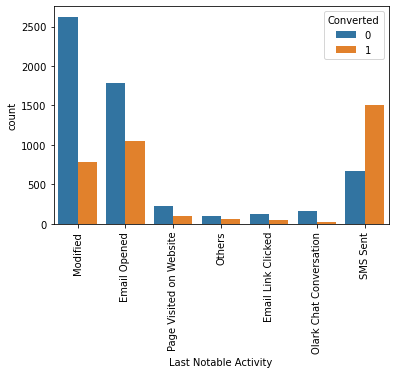

In [60]:
## Last Notable Activity
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_excl)
plt.xticks(rotation = 90)
plt.show()

### Inference from Last Notable Activity
- More leads are from those who have modified their account or opened email. focus should be on their conversion
- SMS sent have high converison

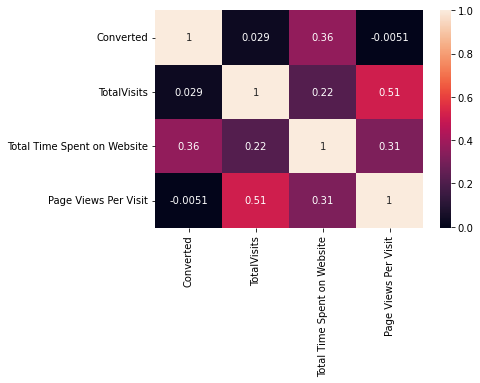

In [61]:
## Numerical columns (TotalVisits, Total Time Spent on Website, Page Views Per Visit, Converted)
sns.heatmap(leads_excl.corr(),annot=True)
plt.show()

### Inference from above heat map
- Strong correlation between Total Visits and Page Views Per Visits
- Converted has good correlation with Total time spent on Website

## Outlier treatment for Numerical columns
- TotalVisits
- Total Time Spent on Website
- Page Views Per Visit

In [62]:
Num_cols = leads_excl[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

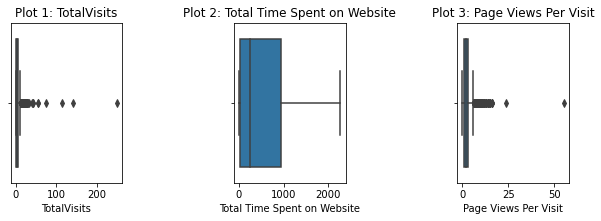

In [63]:
# Checking outliers in all the numerical columns
plt.figure(figsize=(10,10))

for i in enumerate(Num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(leads_excl[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

In [64]:
Q1=Num_cols.quantile(.25)
Q3=Num_cols.quantile(.75)
IQR=Q3-Q1
print(IQR*1.5)

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64


In [65]:
print(Q3+IQR*1.5)

TotalVisits                      11.0
Total Time Spent on Website    2322.0
Page Views Per Visit              6.0
dtype: float64


### Imputing the outliers in TotalVisits and Page Views Per Visit with 1.5*IQR

In [66]:
leads_excl.loc[leads_excl['TotalVisits'] > 11, 'TotalVisits'] = 6
leads_excl.loc[leads_excl['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

In [67]:
leads_excl.shape

(9240, 13)

In [68]:
leads_excl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [69]:
leads_excl.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Others,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


## Dummy creation for 'A free copy of Mastering The Interview'

In [70]:
leads_excl['A free copy of Mastering The Interview'] = leads_excl['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
leads_excl['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [71]:
leads_excl = pd.get_dummies(leads_excl, drop_first=True)
leads_excl.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [72]:
leads_excl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   A free copy of Mastering The Interview                9240 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

## Train-Test Split

In [73]:
X=leads_excl.drop('Converted',axis=1)
y=leads_excl.Converted

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [74]:
to_scale=['TotalVisits','Total Time Spent on Website']
scaler = StandardScaler()
X_train[to_scale]=scaler.fit_transform(X_train[to_scale])

## Model Building

### Feature Selection using RFE

In [75]:
logreg=LogisticRegression()
rfe=RFE(logreg,20).fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 24),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Others', False, 19),
 ('Last Activity_Page Visited on Website', False, 27),
 ('Last Activity_SMS Sent', True, 1),
 

In [76]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others'],
      dtype='object')

### Model 1

In [77]:
X_train_1 = sm.add_constant(X_train[col])
log_m1 = sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
log_model_1 = log_m1.fit()
log_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1607.6
Date:                Tue, 12 Jul 2022   Deviance:                       3215.2
Time:                        15:20:53   Pearson chi2:                 1.07e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5192      0.329    -13.756      0.000      -5.163      -3.875
Total Time Spent on Website                              1.1263      0.053     21.253      0.000       1.022       1.230
Lead Origin_Lead Add Form                                1.8570      0.670      2.771      0.006       0.543       3.171
Lead Source_Olark Chat                                   1.2230      0.129      9.485      0.000       0.970       1.476
Lead Source_Reference                                    1.7282      0.714      2.422      0.015       0.330       3.127
Lead Source_Welingak Website                             3.2255      0.982      3.284      0.001       1.300       5.151
Last Activity_Email Bounced                             -1.2770      0.394     -3.239      0.001      -2.050      -0.504
Last Activity_Email Opened                               1.3549      0.188      7.192      0.000       0.986       1.724
Last Activity_SMS Sent                                   1.7093      0.138     12.372      0.000       1.439       1.980
Specialization_Hospitality Management                   -0.8297      0.418     -1.987      0.047      -1.648      -0.011
Specialization_International Business                   -0.7825      0.361     -2.165      0.030      -1.491      -0.074
Specialization_Travel and Tourism                       -0.7374      0.338     -2.179      0.029      -1.401      -0.074
What is your current occupation_Housewife               21.1650   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
What is your current occupation_Other                   -1.2809      0.103    -12.479      0.000      -1.482      -1.080
What is your current occupation_Working Professional     1.2940      0.270      4.795      0.000       0.765       1.823
Tags_Others                                              3.3277      0.304     10.961      0.000       2.733       3.923
Tags_Ringing                                            -0.6583      0.372     -1.769      0.077      -1.388       0.071
Tags_Will revert after reading the email                 6.6466      0.341     19.516      0.000       5.979       7.314
Last Notable Activity_Email Opened                      -0.9838      0.220     -4.474      0.000      -1.415      -0.553
Last Notable Activity_Modified                          -0.9617      0.136     -7.088      0.000      -1.228      -0.696
Last Notable Activity_Others                             0.6295      0.385      1.635      0.102      -0.125       1.384
========================================================================================================================
"""

### Dropping 'What is your current occupation_Housewife' because of high p-Value and rebuilding model

In [78]:
col = col.drop('What is your current occupation_Housewife', 1)

X_train_2 = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_2,family=sm.families.Binomial())
log_model_2 = log_m2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1609.8
Date:                Tue, 12 Jul 2022   Deviance:                       3219.7
Time:                        15:21:16   Pearson chi2:                 1.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5228      0.329    -13.765      0.000      -5.167      -3.879
Total Time Spent on Website                              1.1270      0.053     21.264      0.000       1.023       1.231
Lead Origin_Lead Add Form                                1.8517      0.670      2.763      0.006       0.538       3.165
Lead Source_Olark Chat                                   1.2196      0.129      9.461      0.000       0.967       1.472
Lead Source_Reference                                    1.7474      0.713      2.449      0.014       0.349       3.146
Lead Source_Welingak Website                             3.2259      0.982      3.284      0.001       1.301       5.151
Last Activity_Email Bounced                             -1.2800      0.395     -3.244      0.001      -2.053      -0.507
Last Activity_Email Opened                               1.3681      0.188      7.287      0.000       1.000       1.736
Last Activity_SMS Sent                                   1.7077      0.138     12.357      0.000       1.437       1.979
Specialization_Hospitality Management                   -0.8370      0.418     -2.002      0.045      -1.657      -0.017
Specialization_International Business                   -0.7880      0.362     -2.178      0.029      -1.497      -0.079
Specialization_Travel and Tourism                       -0.7421      0.339     -2.192      0.028      -1.406      -0.078
What is your current occupation_Other                   -1.2860      0.103    -12.535      0.000      -1.487      -1.085
What is your current occupation_Working Professional     1.2846      0.270      4.758      0.000       0.755       1.814
Tags_Others                                              3.3354      0.304     10.986      0.000       2.740       3.930
Tags_Ringing                                            -0.6563      0.372     -1.763      0.078      -1.386       0.073
Tags_Will revert after reading the email                 6.6593      0.341     19.552      0.000       5.992       7.327
Last Notable Activity_Email Opened                      -0.9939      0.219     -4.531      0.000      -1.424      -0.564
Last Notable Activity_Modified                          -0.9603      0.136     -7.076      0.000      -1.226      -0.694
Last Notable Activity_Others                             0.6288      0.385      1.632      0.103      -0.126       1.384
========================================================================================================================
"""

### Dropping 'Last Notable Activity_Others' because of high p-Value and rebuilding model

In [79]:
col = col.drop('Last Notable Activity_Others', 1)

X_train_3 = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_3,family=sm.families.Binomial())
log_model_3 = log_m3.fit()
log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.1
Date:                Tue, 12 Jul 2022   Deviance:                       3222.3
Time:                        15:21:39   Pearson chi2:                 1.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.4540      0.325    -13.701      0.000      -5.091      -3.817
Total Time Spent on Website                              1.1223      0.053     21.233      0.000       1.019       1.226
Lead Origin_Lead Add Form                                1.8239      0.662      2.755      0.006       0.526       3.121
Lead Source_Olark Chat                                   1.2079      0.129      9.390      0.000       0.956       1.460
Lead Source_Reference                                    1.7607      0.706      2.494      0.013       0.377       3.144
Lead Source_Welingak Website                             3.2640      0.977      3.341      0.001       1.349       5.179
Last Activity_Email Bounced                             -1.0699      0.369     -2.896      0.004      -1.794      -0.346
Last Activity_Email Opened                               1.3604      0.188      7.254      0.000       0.993       1.728
Last Activity_SMS Sent                                   1.6578      0.134     12.342      0.000       1.395       1.921
Specialization_Hospitality Management                   -0.8304      0.416     -1.998      0.046      -1.645      -0.016
Specialization_International Business                   -0.7727      0.361     -2.138      0.033      -1.481      -0.064
Specialization_Travel and Tourism                       -0.7508      0.338     -2.221      0.026      -1.413      -0.088
What is your current occupation_Other                   -1.2823      0.103    -12.509      0.000      -1.483      -1.081
What is your current occupation_Working Professional     1.2788      0.270      4.739      0.000       0.750       1.808
Tags_Others                                              3.3308      0.303     10.979      0.000       2.736       3.925
Tags_Ringing                                            -0.6629      0.372     -1.781      0.075      -1.392       0.067
Tags_Will revert after reading the email                 6.6689      0.340     19.590      0.000       6.002       7.336
Last Notable Activity_Email Opened                      -1.0495      0.216     -4.848      0.000      -1.474      -0.625
Last Notable Activity_Modified                          -1.0141      0.132     -7.711      0.000      -1.272      -0.756
========================================================================================================================
"""

### Dropping 'Tags_Ringing' because of high p-Value and rebuilding model

In [80]:
col = col.drop('Tags_Ringing', 1)

X_train_4 = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_4,family=sm.families.Binomial())
log_model_4 = log_m4.fit()
log_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.6
Date:                Tue, 12 Jul 2022   Deviance:                       3225.3
Time:                        15:22:03   Pearson chi2:                 1.05e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9123      0.225    -21.842      0.000      -5.353      -4.471
Total Time Spent on Website                              1.1210      0.053     21.220      0.000       1.017       1.225
Lead Origin_Lead Add Form                                1.8168      0.659      2.759      0.006       0.526       3.108
Lead Source_Olark Chat                                   1.2107      0.129      9.417      0.000       0.959       1.463
Lead Source_Reference                                    1.7362      0.702      2.473      0.013       0.360       3.112
Lead Source_Welingak Website                             3.2706      0.975      3.356      0.001       1.360       5.181
Last Activity_Email Bounced                             -1.0706      0.370     -2.896      0.004      -1.795      -0.346
Last Activity_Email Opened                               1.3674      0.188      7.270      0.000       0.999       1.736
Last Activity_SMS Sent                                   1.6391      0.134     12.244      0.000       1.377       1.902
Specialization_Hospitality Management                   -0.8011      0.416     -1.926      0.054      -1.616       0.014
Specialization_International Business                   -0.7668      0.361     -2.123      0.034      -1.475      -0.059
Specialization_Travel and Tourism                       -0.7462      0.338     -2.208      0.027      -1.409      -0.084
What is your current occupation_Other                   -1.2824      0.102    -12.526      0.000      -1.483      -1.082
What is your current occupation_Working Professional     1.3012      0.273      4.775      0.000       0.767       1.835
Tags_Others                                              3.7872      0.193     19.595      0.000       3.408       4.166
Tags_Will revert after reading the email                 7.1200      0.251     28.383      0.000       6.628       7.612
Last Notable Activity_Email Opened                      -1.0490      0.217     -4.834      0.000      -1.474      -0.624
Last Notable Activity_Modified                          -1.0005      0.131     -7.623      0.000      -1.258      -0.743
========================================================================================================================
"""

### Dropping 'Specialization_Hospitality Management' because of high p-Value and rebuilding model

In [81]:
col = col.drop('Specialization_Hospitality Management', 1)

X_train_5 = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_5,family=sm.families.Binomial())
log_model_5 = log_m5.fit()
log_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1614.6
Date:                Tue, 12 Jul 2022   Deviance:                       3229.1
Time:                        15:22:35   Pearson chi2:                 1.04e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9266      0.225    -21.907      0.000      -5.367      -4.486
Total Time Spent on Website                              1.1168      0.053     21.196      0.000       1.014       1.220
Lead Origin_Lead Add Form                                1.8325      0.659      2.779      0.005       0.540       3.125
Lead Source_Olark Chat                                   1.2173      0.129      9.473      0.000       0.965       1.469
Lead Source_Reference                                    1.6861      0.702      2.402      0.016       0.310       3.062
Lead Source_Welingak Website                             3.2625      0.975      3.345      0.001       1.351       5.174
Last Activity_Email Bounced                             -1.1086      0.371     -2.989      0.003      -1.836      -0.382
Last Activity_Email Opened                               1.3635      0.188      7.247      0.000       0.995       1.732
Last Activity_SMS Sent                                   1.6360      0.134     12.236      0.000       1.374       1.898
Specialization_International Business                   -0.7524      0.361     -2.086      0.037      -1.459      -0.046
Specialization_Travel and Tourism                       -0.7330      0.338     -2.171      0.030      -1.395      -0.071
What is your current occupation_Other                   -1.2841      0.102    -12.549      0.000      -1.485      -1.084
What is your current occupation_Working Professional     1.3035      0.272      4.797      0.000       0.771       1.836
Tags_Others                                              3.7959      0.193     19.630      0.000       3.417       4.175
Tags_Will revert after reading the email                 7.1201      0.251     28.413      0.000       6.629       7.611
Last Notable Activity_Email Opened                      -1.0472      0.217     -4.825      0.000      -1.473      -0.622
Last Notable Activity_Modified                          -1.0028      0.131     -7.644      0.000      -1.260      -0.746
========================================================================================================================
"""

## Checking VIF

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,15.97
3,Lead Source_Reference,12.95
14,Last Notable Activity_Email Opened,7.33
6,Last Activity_Email Opened,7.22
12,Tags_Others,3.83
4,Lead Source_Welingak Website,3.81
10,What is your current occupation_Other,2.31
13,Tags_Will revert after reading the email,2.22
15,Last Notable Activity_Modified,2.00
7,Last Activity_SMS Sent,1.74


### Dropping 'Lead Source_Reference' because of high VIF

In [83]:
col = col.drop('Lead Source_Reference', 1)

X_train_6 = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train,X_train_6,family=sm.families.Binomial())
log_model_6 = log_m6.fit()
log_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1617.2
Date:                Tue, 12 Jul 2022   Deviance:                       3234.3
Time:                        15:23:22   Pearson chi2:                 9.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9036      0.224    -21.914      0.000      -5.342      -4.465
Total Time Spent on Website                              1.1147      0.053     21.177      0.000       1.012       1.218
Lead Origin_Lead Add Form                                3.3420      0.247     13.531      0.000       2.858       3.826
Lead Source_Olark Chat                                   1.2116      0.129      9.426      0.000       0.960       1.463
Lead Source_Welingak Website                             1.7569      0.760      2.311      0.021       0.267       3.247
Last Activity_Email Bounced                             -1.2059      0.374     -3.229      0.001      -1.938      -0.474
Last Activity_Email Opened                               1.3636      0.188      7.268      0.000       0.996       1.731
Last Activity_SMS Sent                                   1.6253      0.133     12.181      0.000       1.364       1.887
Specialization_International Business                   -0.7430      0.359     -2.068      0.039      -1.447      -0.039
Specialization_Travel and Tourism                       -0.7309      0.338     -2.164      0.030      -1.393      -0.069
What is your current occupation_Other                   -1.2818      0.102    -12.530      0.000      -1.482      -1.081
What is your current occupation_Working Professional     1.3368      0.271      4.940      0.000       0.806       1.867
Tags_Others                                              3.7810      0.193     19.641      0.000       3.404       4.158
Tags_Will revert after reading the email                 7.0994      0.250     28.424      0.000       6.610       7.589
Last Notable Activity_Email Opened                      -1.0542      0.217     -4.866      0.000      -1.479      -0.630
Last Notable Activity_Modified                          -1.0075      0.131     -7.679      0.000      -1.265      -0.750
========================================================================================================================
"""

## Checking VIF

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.33
5,Last Activity_Email Opened,7.22
11,Tags_Others,3.83
9,What is your current occupation_Other,2.31
12,Tags_Will revert after reading the email,2.22
14,Last Notable Activity_Modified,2.00
6,Last Activity_SMS Sent,1.74
1,Lead Origin_Lead Add Form,1.56
2,Lead Source_Olark Chat,1.53
0,Total Time Spent on Website,1.34


### Dropping 'Last Notable Activity_Email Opened' because of high VIF

In [85]:
col = col.drop('Last Notable Activity_Email Opened', 1)

X_train_7 = sm.add_constant(X_train[col])
log_m7 = sm.GLM(y_train,X_train_7,family=sm.families.Binomial())
log_model_7 = log_m7.fit()
log_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.8
Date:                Tue, 12 Jul 2022   Deviance:                       3257.7
Time:                        15:24:29   Pearson chi2:                 9.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1295      0.220    -23.286      0.000      -5.561      -4.698
Total Time Spent on Website                              1.1194      0.052     21.335      0.000       1.017       1.222
Lead Origin_Lead Add Form                                3.3802      0.247     13.662      0.000       2.895       3.865
Lead Source_Olark Chat                                   1.2322      0.128      9.613      0.000       0.981       1.483
Lead Source_Welingak Website                             1.7005      0.762      2.231      0.026       0.207       3.194
Last Activity_Email Bounced                             -1.2411      0.374     -3.318      0.001      -1.974      -0.508
Last Activity_Email Opened                               0.6759      0.127      5.337      0.000       0.428       0.924
Last Activity_SMS Sent                                   1.7639      0.131     13.488      0.000       1.508       2.020
Specialization_International Business                   -0.7259      0.357     -2.034      0.042      -1.425      -0.026
Specialization_Travel and Tourism                       -0.7362      0.336     -2.194      0.028      -1.394      -0.078
What is your current occupation_Other                   -1.3177      0.102    -12.953      0.000      -1.517      -1.118
What is your current occupation_Working Professional     1.3387      0.271      4.937      0.000       0.807       1.870
Tags_Others                                              3.7875      0.192     19.722      0.000       3.411       4.164
Tags_Will revert after reading the email                 7.0642      0.249     28.404      0.000       6.577       7.552
Last Notable Activity_Modified                          -0.6388      0.106     -6.012      0.000      -0.847      -0.431
========================================================================================================================
"""

## Checking VIF

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Others,3.76
9,What is your current occupation_Other,2.31
12,Tags_Will revert after reading the email,2.17
6,Last Activity_SMS Sent,1.74
5,Last Activity_Email Opened,1.64
13,Last Notable Activity_Modified,1.58
1,Lead Origin_Lead Add Form,1.56
2,Lead Source_Olark Chat,1.53
0,Total Time Spent on Website,1.34
10,What is your current occupation_Working Profes...,1.32


### Dropping 'Tags_Others' because of high VIF

In [87]:
col = col.drop('Tags_Others', 1)

X_train_8 = sm.add_constant(X_train[col])
log_m8 = sm.GLM(y_train,X_train_8,family=sm.families.Binomial())
log_model_8 = log_m8.fit()
log_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1999.1
Date:                Tue, 12 Jul 2022   Deviance:                       3998.1
Time:                        15:25:22   Pearson chi2:                 9.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3496      0.122    -19.323      0.000      -2.588      -2.111
Total Time Spent on Website                              1.0409      0.045     23.111      0.000       0.953       1.129
Lead Origin_Lead Add Form                                3.4413      0.212     16.248      0.000       3.026       3.856
Lead Source_Olark Chat                                   1.2770      0.117     10.872      0.000       1.047       1.507
Lead Source_Welingak Website                             2.6073      0.749      3.481      0.000       1.139       4.075
Last Activity_Email Bounced                             -1.0223      0.360     -2.843      0.004      -1.727      -0.318
Last Activity_Email Opened                               0.5832      0.118      4.951      0.000       0.352       0.814
Last Activity_SMS Sent                                   1.5820      0.120     13.194      0.000       1.347       1.817
Specialization_International Business                   -0.5674      0.329     -1.727      0.084      -1.211       0.077
Specialization_Travel and Tourism                       -0.4717      0.323     -1.460      0.144      -1.105       0.162
What is your current occupation_Other                   -0.2842      0.093     -3.066      0.002      -0.466      -0.102
What is your current occupation_Working Professional     1.5988      0.239      6.699      0.000       1.131       2.067
Tags_Will revert after reading the email                 4.2517      0.170     24.961      0.000       3.918       4.586
Last Notable Activity_Modified                          -0.4775      0.098     -4.866      0.000      -0.670      -0.285
========================================================================================================================
"""

### Dropping 'Specialization_Travel and Tourism' because of high p-Value and rebuilding model

In [88]:
col = col.drop('Specialization_Travel and Tourism', 1)

X_train_9 = sm.add_constant(X_train[col])
log_m9 = sm.GLM(y_train,X_train_9,family=sm.families.Binomial())
log_model_9 = log_m9.fit()
log_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.2
Date:                Tue, 12 Jul 2022   Deviance:                       4000.4
Time:                        15:25:44   Pearson chi2:                 9.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3569      0.121    -19.402      0.000      -2.595      -2.119
Total Time Spent on Website                              1.0415      0.045     23.131      0.000       0.953       1.130
Lead Origin_Lead Add Form                                3.4533      0.212     16.313      0.000       3.038       3.868
Lead Source_Olark Chat                                   1.2870      0.117     10.970      0.000       1.057       1.517
Lead Source_Welingak Website                             2.6065      0.749      3.480      0.001       1.138       4.075
Last Activity_Email Bounced                             -1.0352      0.358     -2.889      0.004      -1.738      -0.333
Last Activity_Email Opened                               0.5837      0.118      4.957      0.000       0.353       0.815
Last Activity_SMS Sent                                   1.5791      0.120     13.180      0.000       1.344       1.814
Specialization_International Business                   -0.5566      0.328     -1.695      0.090      -1.200       0.087
What is your current occupation_Other                   -0.2861      0.093     -3.087      0.002      -0.468      -0.104
What is your current occupation_Working Professional     1.5953      0.239      6.688      0.000       1.128       2.063
Tags_Will revert after reading the email                 4.2410      0.170     24.957      0.000       3.908       4.574
Last Notable Activity_Modified                          -0.4828      0.098     -4.924      0.000      -0.675      -0.291
========================================================================================================================
"""

### Dropping 'Specialization_International Business' because of high p-Value and rebuilding model

In [89]:
col = col.drop('Specialization_International Business', 1)

X_train_10 = sm.add_constant(X_train[col])
log_m10 = sm.GLM(y_train,X_train_10,family=sm.families.Binomial())
log_model_10 = log_m10.fit()
log_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.7
Date:                Tue, 12 Jul 2022   Deviance:                       4003.4
Time:                        15:26:04   Pearson chi2:                 9.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3683      0.121    -19.520      0.000      -2.606      -2.131
Total Time Spent on Website                              1.0419      0.045     23.150      0.000       0.954       1.130
Lead Origin_Lead Add Form                                3.4579      0.212     16.347      0.000       3.043       3.872
Lead Source_Olark Chat                                   1.2982      0.117     11.076      0.000       1.068       1.528
Lead Source_Welingak Website                             2.6146      0.749      3.491      0.000       1.147       4.083
Last Activity_Email Bounced                             -1.0412      0.358     -2.904      0.004      -1.744      -0.339
Last Activity_Email Opened                               0.5819      0.118      4.942      0.000       0.351       0.813
Last Activity_SMS Sent                                   1.5777      0.120     13.174      0.000       1.343       1.812
What is your current occupation_Other                   -0.2854      0.093     -3.081      0.002      -0.467      -0.104
What is your current occupation_Working Professional     1.6005      0.238      6.718      0.000       1.134       2.067
Tags_Will revert after reading the email                 4.2359      0.170     24.946      0.000       3.903       4.569
Last Notable Activity_Modified                          -0.4812      0.098     -4.909      0.000      -0.673      -0.289
========================================================================================================================
"""

### P-Value is under control, lets check VIF

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.81
7,What is your current occupation_Other,1.57
1,Lead Origin_Lead Add Form,1.52
2,Lead Source_Olark Chat,1.47
6,Last Activity_SMS Sent,1.45
10,Last Notable Activity_Modified,1.42
5,Last Activity_Email Opened,1.32
0,Total Time Spent on Website,1.31
8,What is your current occupation_Working Profes...,1.31
3,Lead Source_Welingak Website,1.26


### VIF is also under control as none have more than 5 VIF value

## Probability prediction

In [91]:
y_train_pred = log_model_10.predict(X_train_10).values.reshape(-1)
y_train_pred[:10]

array([0.19612936, 0.14424799, 0.22995056, 0.65288555, 0.13103269,
       0.99907668, 0.0726417 , 0.87396105, 0.07559976, 0.99593963])

In [92]:
y_train_pred

array([0.19612936, 0.14424799, 0.22995056, ..., 0.19612936, 0.03495016,
       0.10181121])

In [93]:
y_train

1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

In [94]:
y_train_pred_final = pd.DataFrame({'Converted_Ind':y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect_Id'] = y_train.index
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id
0,0,0.196129,1871
1,0,0.144248,6795
2,0,0.229951,3516
3,0,0.652886,8105
4,0,0.131033,3934


In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted
0,0,0.196129,1871,0
1,0,0.144248,6795,0
2,0,0.229951,3516,0
3,0,0.652886,8105,1
4,0,0.131033,3934,0


## Creating Confusion Matrix

In [96]:
confusion = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted )
confusion

array([[3745,  257],
       [ 617, 1849]], dtype=int64)

##      Actual/Predicted             
                                    not_converted    converted
                    not_converted          3558           444
                    converted              880            1586  

In [97]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted)

0.8648732220160792

In [98]:
print(classification_report( y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted ))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4002
           1       0.88      0.75      0.81      2466

    accuracy                           0.86      6468
   macro avg       0.87      0.84      0.85      6468
weighted avg       0.87      0.86      0.86      6468



## Metrics beyond Accuracy

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity/recall of our logistic regression model -- True Positive Rate
TP / float(TP+FN)

0.7497972424979724

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.9357821089455273

In [103]:
# Calculate false postive rate - predicting converted when customer does have not converted -- 1-Specificity
print(FP/ float(TN+FP))

0.06421789105447276


In [104]:
# positive predictive value - Precision
print (TP / float(TP+FP))

0.8779677113010447


In [105]:
# Negative predictive value - Precision
print (TN / float(TN+ FN))

0.8585511233379184


## Plotting ROC Curve

## An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows to the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob, drop_intermediate = False )

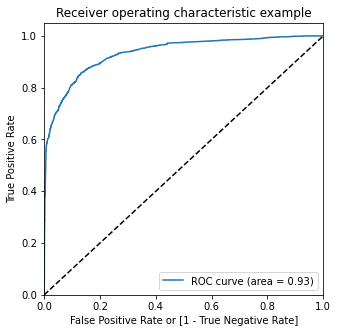

In [108]:
draw_roc(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

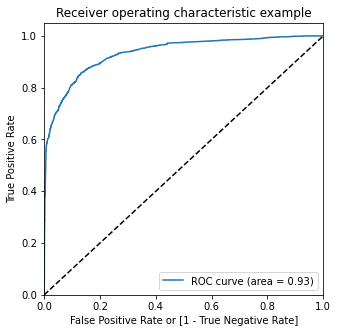

In [109]:
draw_roc(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

## Finding Optimal Cut-Off point

### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196129,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.144248,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.229951,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.652886,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.131033,3934,0,1,1,0,0,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.718306  0.966748  0.565217
0.2   0.2  0.835807  0.894566  0.799600
0.3   0.3  0.864255  0.848337  0.874063
0.4   0.4  0.864564  0.785888  0.913043
0.5   0.5  0.864873  0.749797  0.935782
0.6   0.6  0.861163  0.706407  0.956522
0.7   0.7  0.854515  0.667883  0.969515
0.8   0.8  0.845083  0.624088  0.981259
0.9   0.9  0.834106  0.577859  0.992004


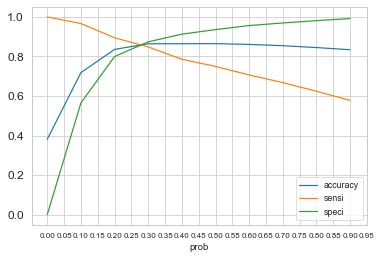

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196129,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.144248,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.229951,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.652886,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.131033,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [114]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8625541125541125

In [115]:
confusion2 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted )
confusion2

array([[3460,  542],
       [ 347, 2119]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8592862935928629

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.8645677161419291

In [119]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13543228385807096


In [120]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7963171739947388


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9088521145258734


## Precision and Recall

In [122]:
## Precision - TP/TP+FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7963171739947388

In [123]:
## Recall - TP/TP+FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8592862935928629

### Using Sklearn utility for Precision and recall

In [124]:
precision_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.7963171739947388

In [125]:
recall_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8592862935928629

### Precision and Recall Tradeoff
For our Business Problem, The appropriate Metrics to be use will be Recall and Precision.
- Because this will help us to identify the predicted CONVERTED is actual CONVERTED and
- Probability that an actual CONVERTED case is predicted correctly.
So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [126]:
y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted_Ind, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

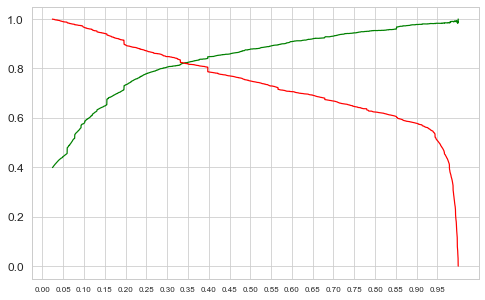

In [128]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

### The precision and Recall seem to have trade-off at .33, hence .33 will be used as threshold on test data

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196129,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.144248,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.229951,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.652886,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.131033,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [130]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8647186147186147

In [131]:
confusion3 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted )
confusion3

array([[3532,  470],
       [ 405, 2061]], dtype=int64)

In [132]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8357664233576643

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.8825587206396801

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8825587206396801

In [136]:
# Calculate false postive rate - predicting converted when customer have not
print(FP/ float(TN+FP))

0.11744127936031984


In [137]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8143026471750296


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8971297942595885


## Precision and Recall

In [139]:
precision_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8143026471750296

In [140]:
recall_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8357664233576643

## Making Prediction on Test data

In [141]:
## Scaling
to_scale=['TotalVisits','Total Time Spent on Website']
X_test[to_scale]=scaler.transform(X_test[to_scale])

In [142]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2772 non-null   float64
 1   Total Time Spent on Website                           2772 non-null   float64
 2   Lead Origin_Lead Add Form                             2772 non-null   uint8  
 3   Lead Source_Olark Chat                                2772 non-null   uint8  
 4   Lead Source_Welingak Website                          2772 non-null   uint8  
 5   Last Activity_Email Bounced                           2772 non-null   uint8  
 6   Last Activity_Email Opened                            2772 non-null   uint8  
 7   Last Activity_SMS Sent                                2772 non-null   uint8  
 8   What is your current occupation_Other                 2

In [143]:
# Predicting the final test model 
y_test_pred = log_model_10.predict(X_test_sm)
y_test_pred[:10]

4269    0.482221
2376    0.997479
7766    0.934505
9199    0.077716
4359    0.993206
9186    0.975624
1631    0.969473
8963    0.884720
8007    0.032246
5324    0.944160
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.482221
2376,0.997479
7766,0.934505
9199,0.077716
4359,0.993206


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [146]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.482221
1,1,2376,0.997479
2,1,7766,0.934505
3,0,9199,0.077716
4,1,4359,0.993206


In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [151]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

In [152]:
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.482221
1,2376,1,0.997479
2,7766,1,0.934505
3,9199,0,0.077716
4,4359,1,0.993206


In [153]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.482221,1
1,2376,1,0.997479,1
2,7766,1,0.934505,1
3,9199,0,0.077716,0
4,4359,1,0.993206,1


In [154]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8668831168831169

In [155]:
confusion_final = confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1486,  191],
       [ 178,  917]], dtype=int64)

In [156]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8374429223744292

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.8861061419200954

### Precision and Recall

In [159]:
precision_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8276173285198556

In [160]:
recall_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8374429223744292

### ROC Curve

In [161]:
fpr, tpr, thresholds = roc_curve(y_pred_final.Converted_IND, y_pred_final.Converted_Prob, drop_intermediate=False)

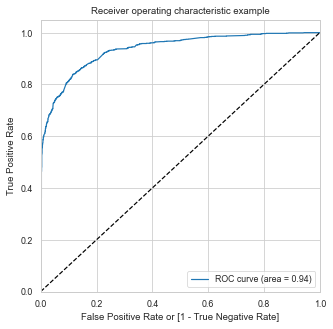

In [162]:
# Invoking the functio to draw ROC curve
draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

## Lead Scoring

In [163]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
2771,2960,1,0.997479,1,99
1859,2852,1,0.997915,1,99
441,3725,1,0.994415,1,99
440,2629,1,0.993206,1,99
1880,8106,1,0.999490,1,99
...,...,...,...,...,...
116,5523,0,0.007088,0,0
796,6934,0,0.006255,0,0
2521,8733,0,0.008324,0,0
1508,5380,0,0.008656,0,0


# Using Decision Trees

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [165]:
X_train.shape, X_test.shape

((6468, 55), (2772, 55))

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [168]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [169]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [170]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1677
           1       0.83      0.86      0.84      1095

    accuracy                           0.88      2772
   macro avg       0.87      0.87      0.87      2772
weighted avg       0.88      0.88      0.88      2772



#### Plot the ROC curve

In [172]:
from sklearn.metrics import plot_roc_curve

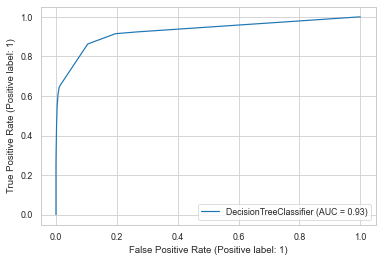

In [173]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()